# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

In [1]:
import os
data_path = ['data']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [3]:
df_iris = pd.read_csv('data/Iris_Data.csv', sep=',')

print("Número de pontos do dataframe:", df_iris.shape[0])

print("Nome das colunas: ", np.array(df_iris.columns))
print("\n")
print("Tipos associados: \n",df_iris.dtypes)

Número de pontos do dataframe: 150
Nome das colunas:  ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']


Tipos associados: 
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

In [4]:
df_iris['species'] = df_iris.species.str.replace("Iris-","")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

In [5]:
print("Quantidade de cada espécie")
print(df_iris['species'].value_counts())
print("\n")

print(df_iris.describe())

Quantidade de cada espécie
setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [6]:
df_iris['species'] = df_iris.species.str.replace("Iris-","")

#Dividindo o dataframe
setosa = df_iris.groupby('species').get_group('setosa')
versicolor = df_iris.groupby('species').get_group('versicolor')
virginica = df_iris.groupby('species').get_group('virginica')

print("Setosa média\n", setosa.mean())
print("\n")
print("Setosa mediana\n", setosa.median())
print("\n")

print("Versicolor média\n", versicolor.mean())
print("\n")
print("Versicolor mediana\n", versicolor.median())
print("\n")

print("Virginica média\n", virginica.mean())
print("\n")
print("Virginica mediana\n", virginica.median())
print("\n")

print("Média e mediana por espécie em uma única tabela")
teste = df_iris.groupby('species')
print(teste.agg([np.mean, np.median]))

Setosa média
 sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64


Setosa mediana
 sepal_length    5.0
sepal_width     3.4
petal_length    1.5
petal_width     0.2
dtype: float64


Versicolor média
 sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64


Versicolor mediana
 sepal_length    5.90
sepal_width     2.80
petal_length    4.35
petal_width     1.30
dtype: float64


Virginica média
 sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64


Virginica mediana
 sepal_length    6.50
sepal_width     3.00
petal_length    5.55
petal_width     2.00
dtype: float64


Média e mediana por espécie em uma única tabela
           sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa         

## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

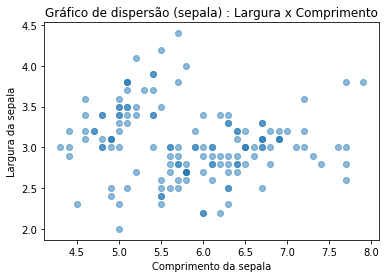

In [7]:
grafico = plt.scatter(df_iris['sepal_length'], df_iris['sepal_width'], alpha = 0.5)
plt.xlabel("Comprimento da sepala")
plt.ylabel("Largura da sepala")
plt.title('Gráfico de dispersão (sepala) : Largura x Comprimento')

plt.show()

## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

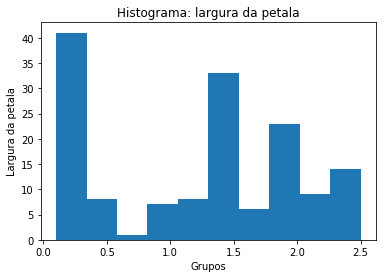

In [8]:
histograma_petal_width = plt.hist(df_iris['petal_width'])
plt.title('Histograma: largura da petala')
plt.xlabel("Grupos")
plt.ylabel("Largura da petala")
plt.show()

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

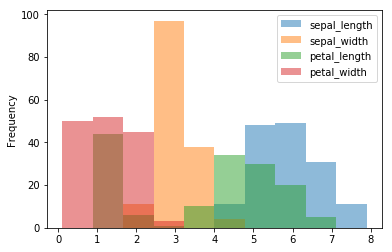

In [9]:
plt.figure()
df_iris.plot.hist(alpha=0.5)

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

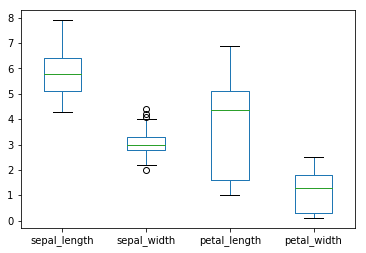

In [10]:
df_iris.plot.box()

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.

In [ ]:
sns.pairplot(df_iris, hue='species')